#Colab Setup

In [4]:
# This block is needed (only) for Colab
# If Colab: Click Runtime -> Change runtime type -> select Hardware accelerator: GPU
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#Import

In [182]:
from fastai.tabular.all import *

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import pandas as pd

#Data preparation

In [183]:
df = pd.read_csv('gdrive/MyDrive/Lab4/titanic.csv')
df
#Pclass     Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#survival   Survival (0 = No; 1 = Yes)
#name       Name
#sex        Sex
#age        Age
#sibsp      Number of Siblings/Spouses Aboard
#parch      Number of Parents/Children Aboard
#ticket     Ticket Number
#fare       Passenger Fare (British pound)
#cabin      Cabin
#embarked   Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
#boat       Lifeboat
#body Body  Identification Number
#home.dest  Home/Destination

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,?,C,?,328,?
1305,3,0,"Zabour, Miss. Thamine",female,?,1,0,2665,14.4542,?,C,?,?,?
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,?,C,?,304,?
1307,3,0,"Zakarian, Mr. Ortin",male,27,0,0,2670,7.225,?,C,?,?,?


In [184]:
#Boat 100% means they surivied, body 100% means they died, which means we can remove these columns
#It would not be meaningful prediction if these fields were kept, "100% of pregnant people are women"
#Name should not matter, as Mr/Ms is reflected on "sex"
#Ticket should not matter, as it is only a random ticket number???
df = df.drop(columns=['boat', 'body', 'name', 'ticket'])
df

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,home.dest
0,1,1,female,29,0,0,211.3375,B5,S,"St Louis, MO"
1,1,1,male,0.9167,1,2,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2,1,2,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30,1,2,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25,1,2,151.55,C22 C26,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5,1,0,14.4542,?,C,?
1305,3,0,female,?,1,0,14.4542,?,C,?
1306,3,0,male,26.5,0,0,7.225,?,C,?
1307,3,0,male,27,0,0,7.225,?,C,?


In [185]:
df.dtypes

pclass        int64
survived      int64
sex          object
age          object
sibsp         int64
parch         int64
fare         object
cabin        object
embarked     object
home.dest    object
dtype: object

Cleaning data and changing data types

In [186]:
#What to do with data that is missing, remove row if only one field is missing?
df = df[df.age != '?']
df = df[df.fare != '?']
df = df.astype({'fare': 'float'})
df = df.astype({'age': 'float'}) #Float is used for baseline when comparing ages
df.dtypes

pclass         int64
survived       int64
sex           object
age          float64
sibsp          int64
parch          int64
fare         float64
cabin         object
embarked      object
home.dest     object
dtype: object

In [187]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,home.dest
0,1,1,female,29.0000,0,0,211.3375,B5,S,"St Louis, MO"
1,1,1,male,0.9167,1,2,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


Baseline

In [189]:
#Baseline assumes that women and children survive (under 14)
correct = 0
for index, row in df.iterrows():
  survivePred = False
  if(df.loc[index, 'sex'] == 'female'):
    survivePred = True
  if(df.loc[index, 'age'] < 13):
    survivePred = True

  if(df.loc[index, 'survived'] == 1):
    if survivePred:
      correct += 1
  else:
    if not survivePred:
      correct += 1
baseLineAcc = correct/df.shape[0]
print("Accuracy of baseline: " + str(baseLineAcc))

Accuracy of baseline: 0.7827751196172249


Data normalization, and splitting for training set

In [190]:
splits = RandomSplitter(valid_pct=0.2, seed = 1337)(range_of(df))

to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = ['sex','cabin', 'embarked', 'home.dest'], #cant be greater/lesser
                   cont_names = ['pclass', 'age', 'sibsp', 'parch', 'fare'], #continuous (you can rank them as greater/lesser)
                   y_names='survived',
                   splits=splits)
to.xs.iloc[:]

,sex,cabin,embarked,home.dest,pclass,age,sibsp,parch,fare
811,1,1,4,262,0.945988,1.259932,0.537913,2.992979,-0.042355
340,1,173,4,140,-0.248643,-1.788301,1.634731,0.667579,0.039450
1231,1,174,4,1,0.945988,-0.056351,0.537913,0.667579,-0.465304
408,2,1,4,79,-0.248643,-0.818409,-0.558905,-0.495121,-0.464641
402,1,1,2,19,-0.248643,0.012928,0.537913,-0.495121,-0.405241
...,...,...,...,...,...,...,...,...,...
200,2,92,2,326,-1.443275,1.121376,-0.558905,-0.495121,0.680470
138,2,107,4,342,-1.443275,0.567152,-0.558905,0.667579,2.063991
636,1,1,4,5,0.945988,-0.818409,0.537913,-0.495121,-0.335523
316,2,1,2,122,-1.443275,1.467766,-0.558905,0.667579,0.435279


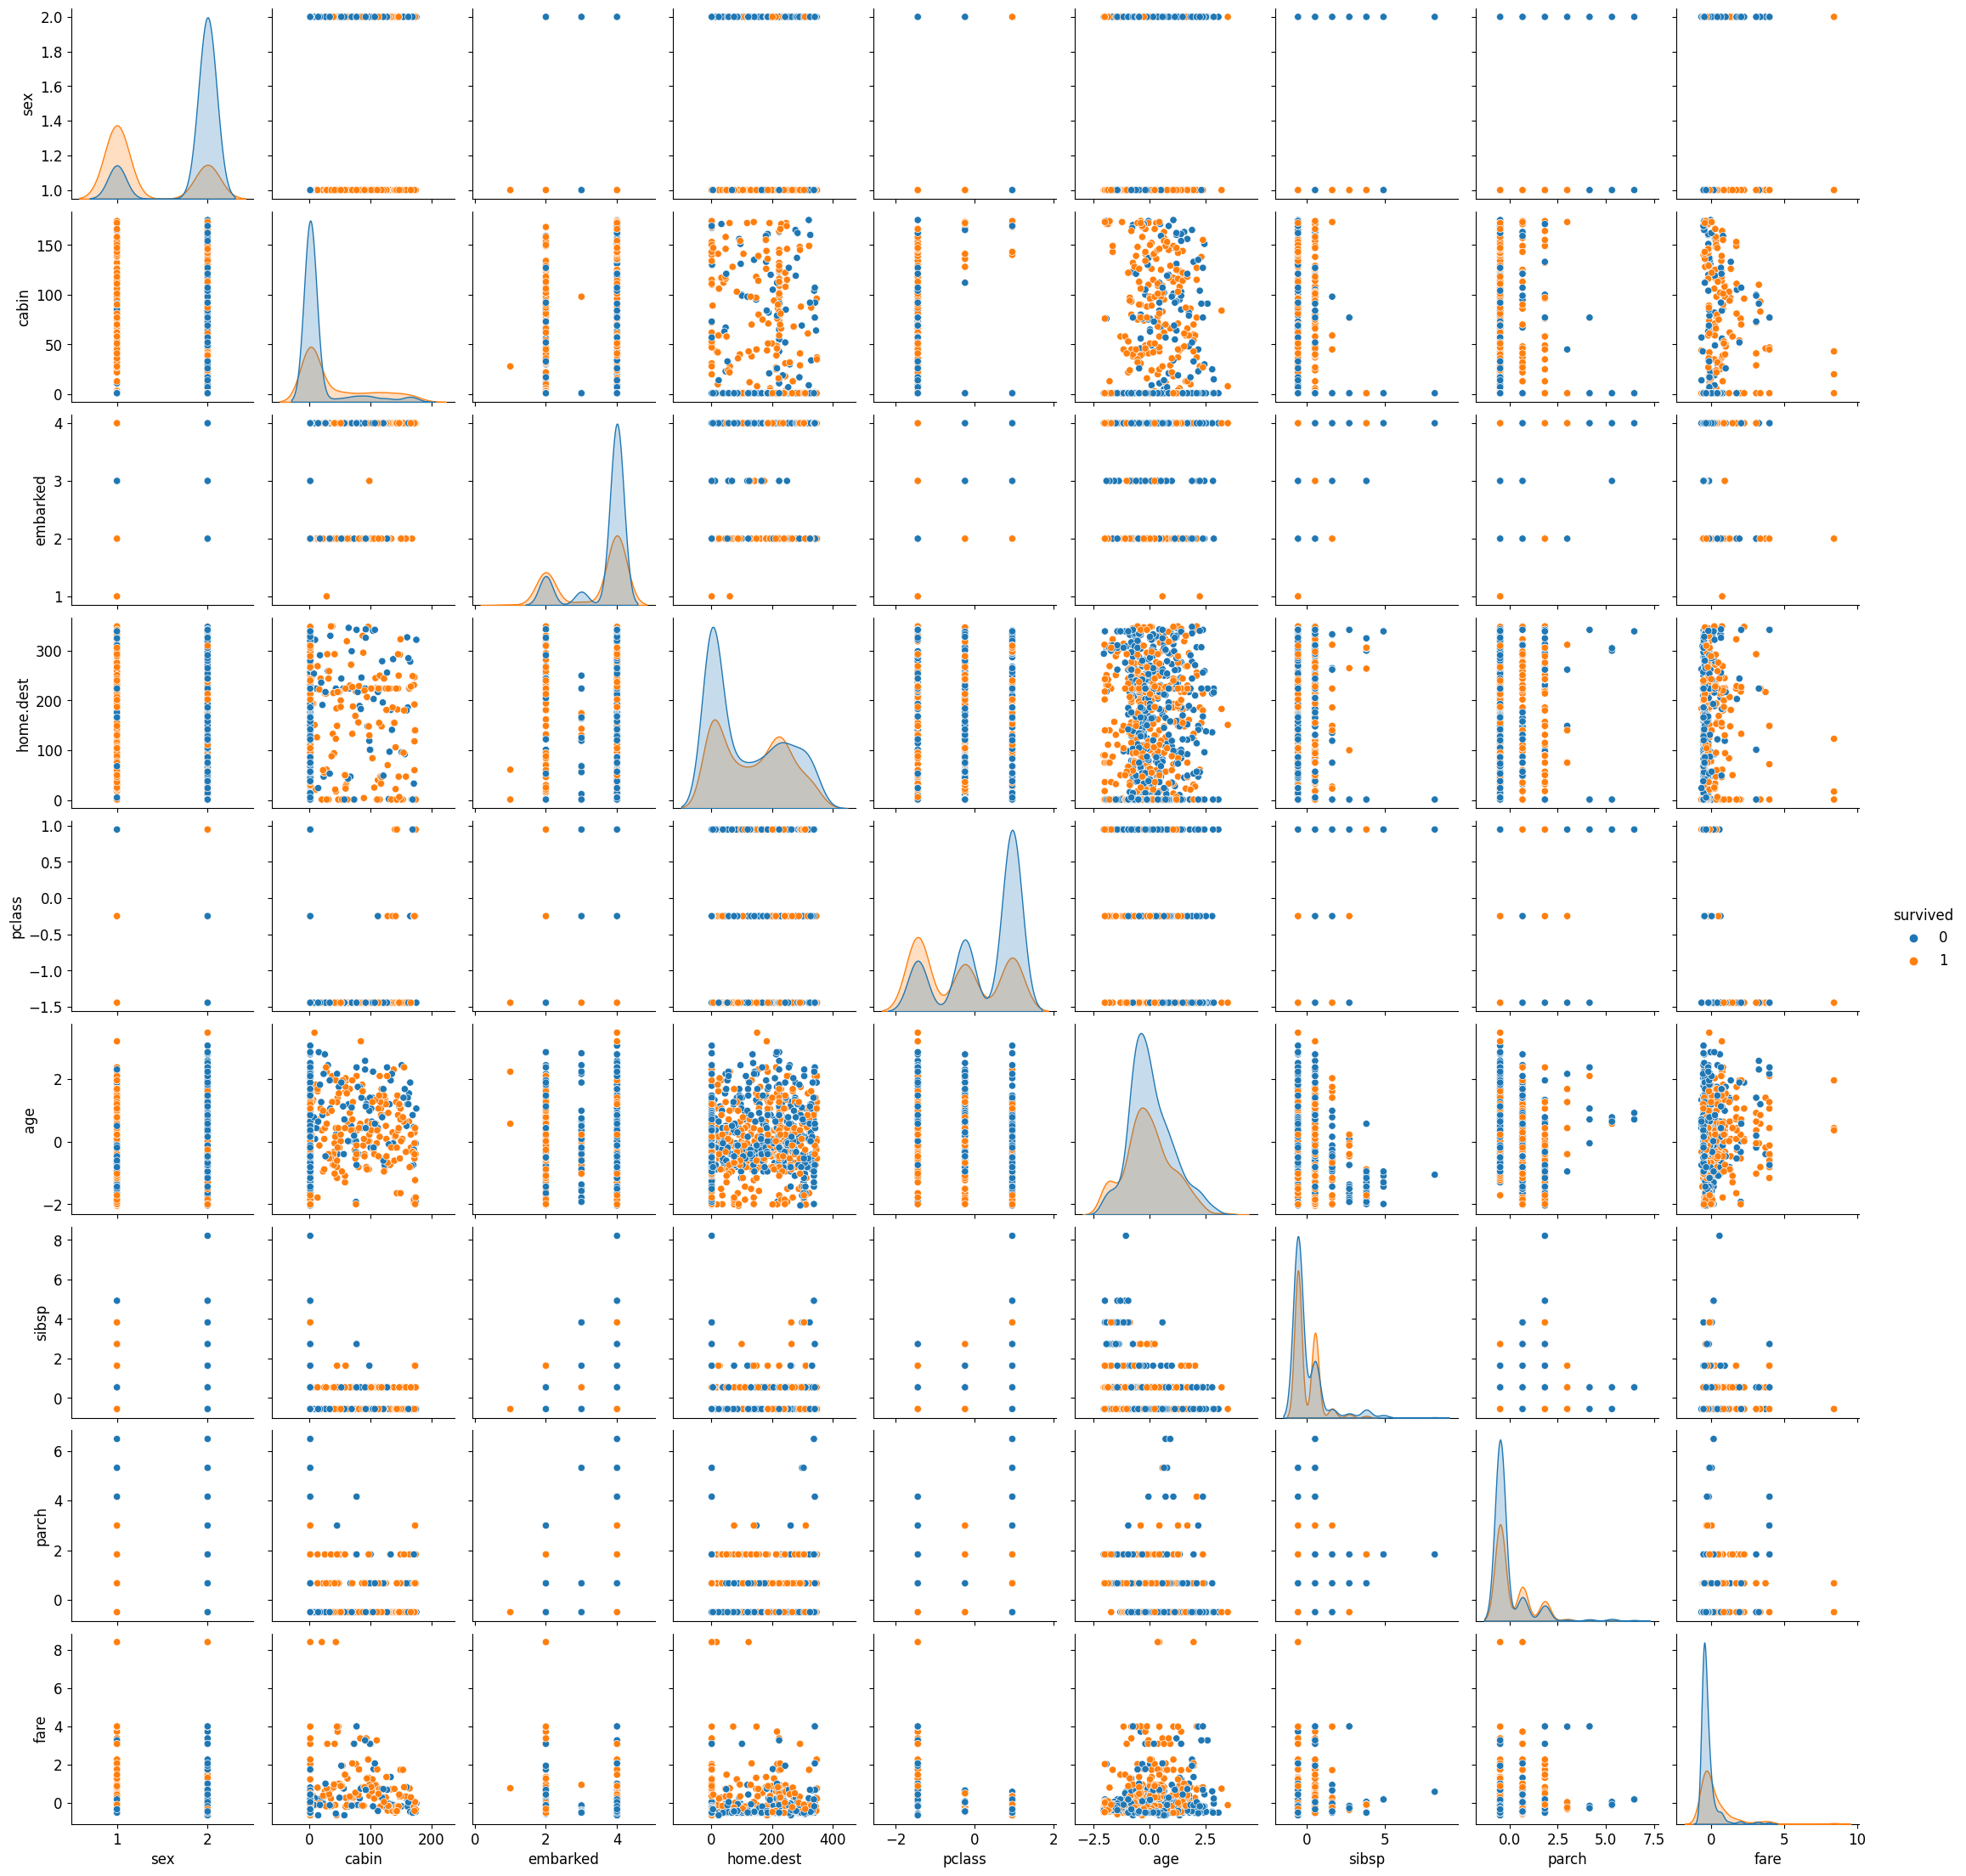

In [73]:
#This also assigns "survived" as class for each row, 0 if not survived 1 if survived
sns.pairplot(to.xs.iloc[:].assign(survived=to.ys.iloc[:]), hue='survived', kind='scatter')

In [191]:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_valid, y_valid = to.valid.xs, to.valid.ys.values.ravel()
X_train

,sex,cabin,embarked,home.dest,pclass,age,sibsp,parch,fare
811,1,1,4,262,0.945988,1.259932,0.537913,2.992979,-0.042355
340,1,173,4,140,-0.248643,-1.788301,1.634731,0.667579,0.039450
1231,1,174,4,1,0.945988,-0.056351,0.537913,0.667579,-0.465304
408,2,1,4,79,-0.248643,-0.818409,-0.558905,-0.495121,-0.464641
402,1,1,2,19,-0.248643,0.012928,0.537913,-0.495121,-0.405241
...,...,...,...,...,...,...,...,...,...
1148,2,1,4,1,0.945988,0.359318,-0.558905,-0.495121,-0.524336
593,1,1,4,36,-0.248643,0.220762,0.537913,1.830279,-0.159533
648,2,1,2,240,0.945988,-0.610575,-0.558905,-0.495121,-0.522567
453,2,1,4,223,-0.248643,-0.610575,-0.558905,-0.495121,0.649664


[Text(0.4230769230769231, 0.9, 'sex <= 1.5\ngini = 0.488\nsamples = 836\nvalue = [483, 353]\nclass = y[0]'),
 Text(0.15384615384615385, 0.7, 'pclass <= 0.349\ngini = 0.357\nsamples = 309\nvalue = [72, 237]\nclass = y[1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.137\nsamples = 190\nvalue = [14, 176]\nclass = y[1]'),
 Text(0.23076923076923078, 0.5, 'fare <= -0.242\ngini = 0.5\nsamples = 119\nvalue = [58, 61]\nclass = y[1]'),
 Text(0.15384615384615385, 0.3, 'age <= -0.368\ngini = 0.488\nsamples = 104\nvalue = [44, 60]\nclass = y[1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.444\nsamples = 66\nvalue = [22, 44]\nclass = y[1]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.488\nsamples = 38\nvalue = [22, 16]\nclass = y[0]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]\nclass = y[0]'),
 Text(0.6923076923076923, 0.7, 'cabin <= 5.5\ngini = 0.343\nsamples = 527\nvalue = [411, 116]\nclass = y[0]'),
 Text(0.5384615384615384, 0.5, 'age <= -1.407\ngini = 0.27\nsampl

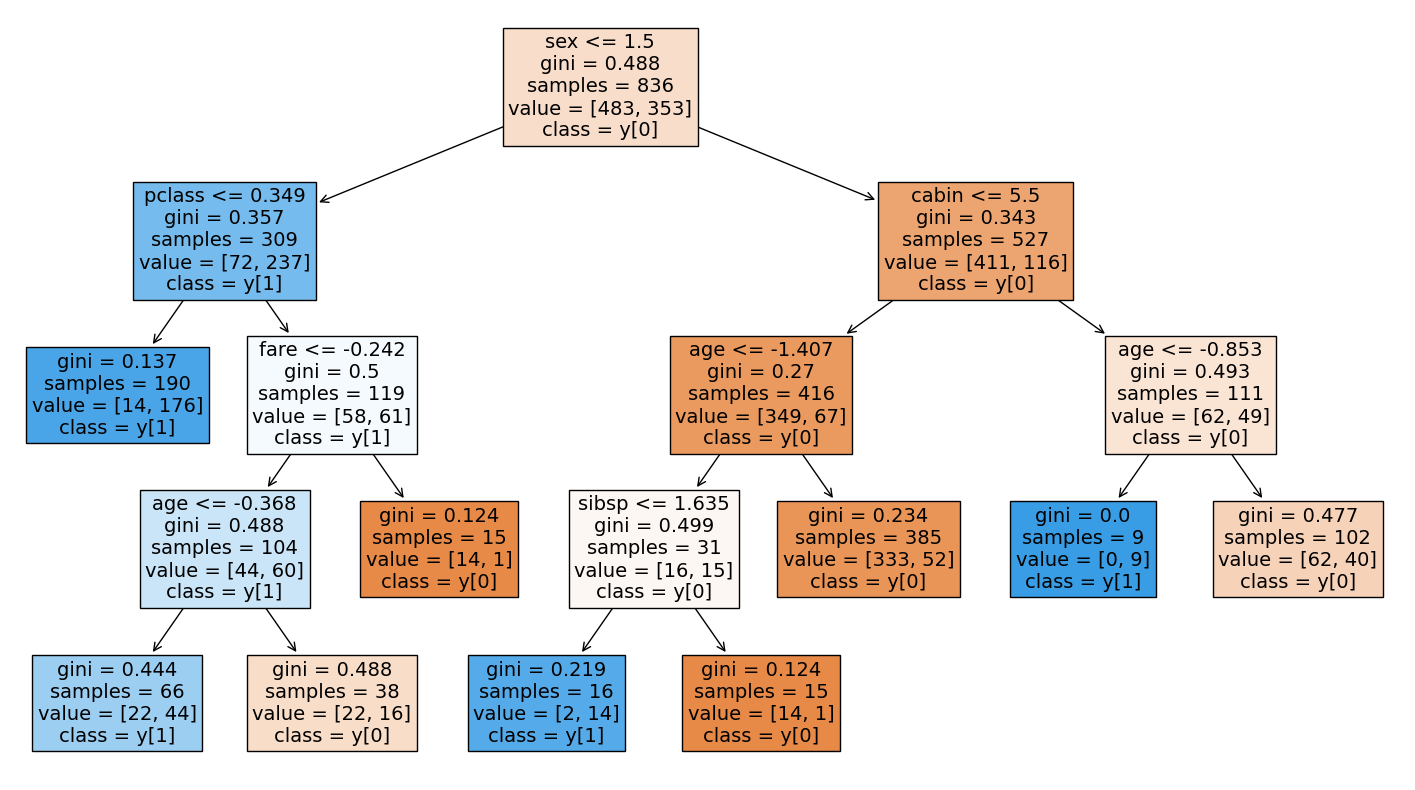

In [192]:
clf = DecisionTreeClassifier(max_leaf_nodes=9, random_state=0)
clf.fit(X_train, y_train)

plt.figure(figsize=(18,10))  # set plot size (denoted in inches)
#dont know what to put as class_names??? to.y_names gives list index out of range
#to.vocav gives atrubuteerror
#class_names=True gives class=y[0] or class=y[1]
tree.plot_tree(clf, fontsize=14, feature_names=to.x_names, class_names=True, filled=True)

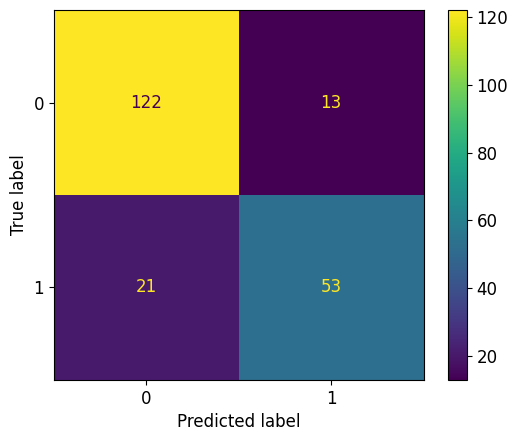

In [193]:
#Test model on validation set
ConfusionMatrixDisplay.from_estimator(clf, X_valid, y_valid)

In [194]:
treeAccuracy = accuracy_score(clf.predict(X_valid), y_valid)
print("Baseline accuracy is: " + str(baseLineAcc))
print("Accuracy of tree is: " + str(treeAccuracy))
print("Increased accuracy by " + str(round(100*(treeAccuracy - baseLineAcc), 2)) + "% compared to baseline")

Baseline accuracy is: 0.7827751196172249
Accuracy of tree is: 0.8373205741626795
Increased accuracy by 5.45% compared to baseline


In [195]:
feature_importance = pd.Series(clf.feature_importances_, index=X_train.columns) #list(zip(X_train.columns, clf.feature_importances_))
feature_importance

sex          0.618818
cabin        0.073170
embarked     0.000000
home.dest    0.000000
pclass       0.133032
age          0.084990
sibsp        0.053734
parch        0.000000
fare         0.036256
dtype: float64

<Axes: >

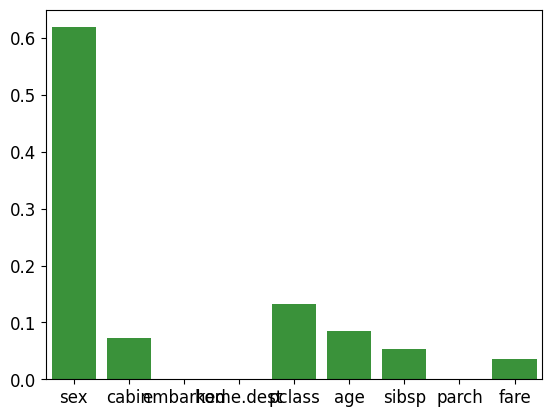

In [196]:
sns.barplot(x=X_train.columns, y=clf.feature_importances_, color='C2')

#Random forest

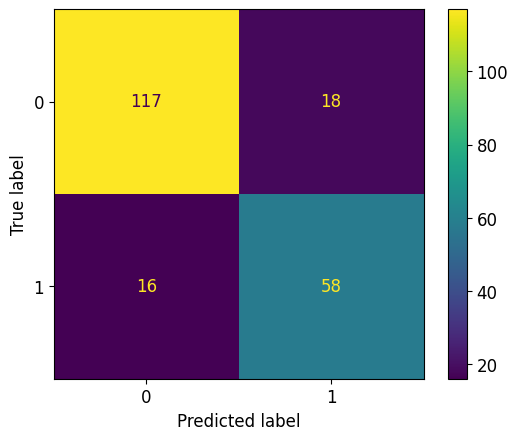

In [197]:
rf = RandomForestClassifier(n_estimators=200, max_depth=9, random_state=0)
rf.fit(X_train, y_train)
ConfusionMatrixDisplay.from_estimator(rf, X_valid, y_valid)

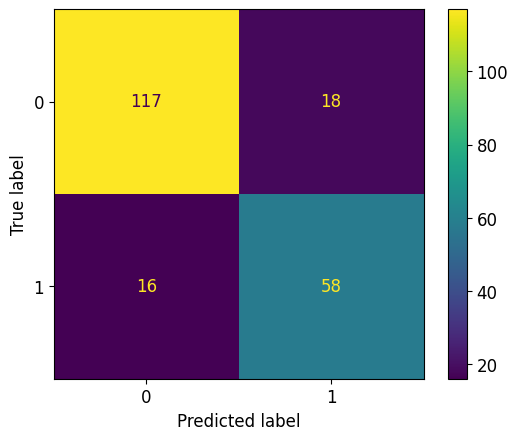

In [198]:
ConfusionMatrixDisplay.from_estimator(rf, X_valid, y_valid)

In [199]:
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns) #list(zip(X_train.columns, clf.feature_importances_))
feature_importance

sex          0.313766
cabin        0.090117
embarked     0.032302
home.dest    0.108363
pclass       0.074293
age          0.149974
sibsp        0.040251
parch        0.037319
fare         0.153616
dtype: float64

<Axes: >

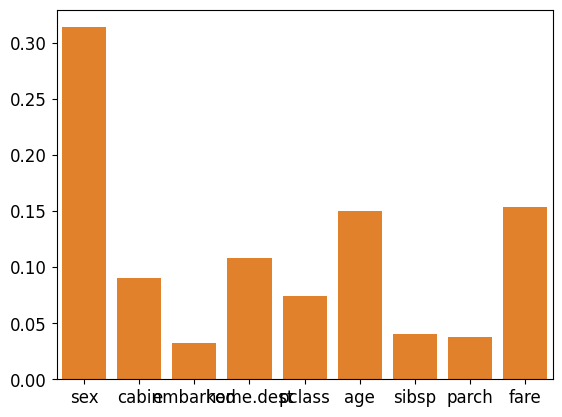

In [200]:
sns.barplot(x=X_train.columns, y=rf.feature_importances_, color='C1')

In [201]:
forestAccuracy = accuracy_score(rf.predict(X_valid), y_valid)
print("Baseline accuracy is: " + str(baseLineAcc))
print("Accuracy of tree is: " + str(treeAccuracy))
print("Accuracy of forest is: " + str(forestAccuracy))
print("Increased accuracy by " + str(round(100*(forestAccuracy - baseLineAcc), 2)) + "% compared to baseline")

Baseline accuracy is: 0.7827751196172249
Accuracy of tree is: 0.8373205741626795
Accuracy of forest is: 0.8373205741626795
Increased accuracy by 5.45% compared to baseline


#Neural Network

In [116]:
toNeural = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cat_names = ['sex','cabin', 'embarked', 'home.dest'], #cant be greater/lesser
                   cont_names = ['pclass', 'age', 'sibsp', 'parch', 'fare'], #continuous (you can rank them as greater/lesser)
                   y_names='survived',
                   splits=splits)

In [117]:
dls = toNeural.dataloaders(bs=8)
dls.show_batch()

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


,sex,cabin,embarked,home.dest,pclass,age,sibsp,parch,fare,survived
0,male,?,S,"West Bromwich, England Pontiac, MI",3.0,24.000000,2.000000e+00,-4.691512e-09,24.150000,0.0
1,male,B30,C,"Providence, RI",1.0,64.999999,-2.581446e-08,1.000000e+00,61.979199,0.0
2,female,C103,S,"Birkdale, England Cleveland, Ohio",1.0,58.000000,-2.581446e-08,-4.691512e-09,26.549999,1.0
3,male,B96 B98,S,"Bryn Mawr, PA",1.0,36.000000,1.000000e+00,2.000000e+00,119.999999,1.0
4,female,?,C,"Syria Ottawa, ON",3.0,45.000001,-2.581446e-08,1.000000e+00,14.454199,0.0
5,male,?,S,"Cornwall / Houghton, MI",2.0,18.000000,-2.581446e-08,-4.691512e-09,10.499999,0.0
6,female,?,S,?,3.0,26.000000,-2.581446e-08,2.000000e+00,13.775000,0.0
7,female,C123,S,"Scituate, MA",1.0,35.000000,1.000000e+00,-4.691512e-09,53.099998,1.0


In [118]:
learn = tabular_learner(dls, metrics=accuracy)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_co

SuggestedLRs(valley=0.0063095735386013985)

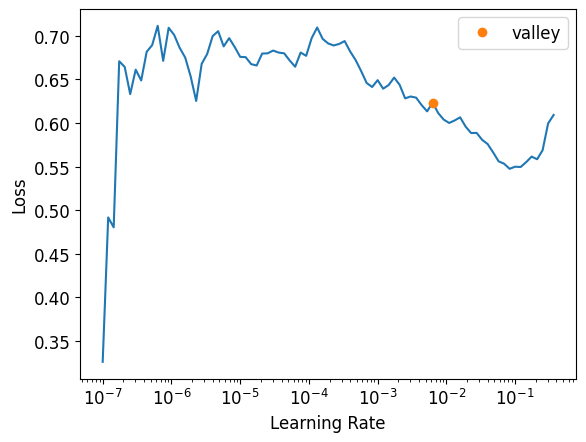

In [119]:
learn.lr_find()

In [127]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.078513,0.128256,0.645933,00:02
1,0.085009,0.128892,0.645933,00:02
2,0.083151,0.127362,0.645933,00:02
3,0.079089,0.119562,0.645933,00:01
4,0.088850,0.120975,0.645933,00:01
5,0.080807,0.123252,0.645933,00:01
6,0.074286,0.122060,0.645933,00:01
7,0.070939,0.119765,0.645933,00:01
8,0.067980,0.135087,0.645933,00:02
9,0.070525,0.124742,0.645933,00:02


/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_co

In [128]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.078553,0.126040,0.645933,00:01


/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_co

epoch,train_loss,valid_loss,accuracy,time
0,0.081230,0.119830,0.645933,00:01
1,0.075443,0.123166,0.645933,00:02
2,0.081330,0.127369,0.645933,00:02
3,0.067973,0.121315,0.645933,00:02
4,0.077130,0.127102,0.645933,00:02
5,0.078608,0.131982,0.645933,00:02
6,0.084545,0.130136,0.645933,00:02
7,0.075722,0.121634,0.645933,00:01
8,0.074552,0.123294,0.645933,00:01
9,0.075571,0.125842,0.645933,00:01


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr

KeyboardInterrupt: ignored

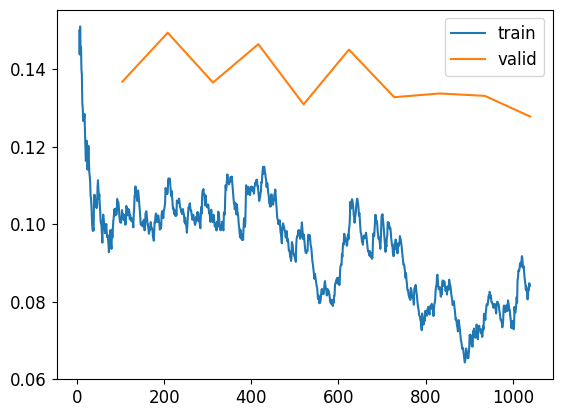

In [124]:
learn.recorder.plot_loss()

In [129]:
learn.show_results()

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,accuracy,time
0,0.081230,0.119830,0.645933,00:01
1,0.075443,0.123166,0.645933,00:02
2,0.081330,0.127369,0.645933,00:02
3,0.067973,0.121315,0.645933,00:02
4,0.077130,0.127102,0.645933,00:02
5,0.078608,0.131982,0.645933,00:02
6,0.084545,0.130136,0.645933,00:02
7,0.075722,0.121634,0.645933,00:01
8,0.074552,0.123294,0.645933,00:01
9,0.075571,0.125842,0.645933,00:01


,sex,cabin,embarked,home.dest,pclass,age,sibsp,parch,fare,survived,survived_pred
0,2.0,107.0,4.0,342.0,-1.443275,0.567152,-0.558905,0.667579,2.063991,0.0,0.064472
1,1.0,1.0,4.0,306.0,0.945988,-1.719023,3.828367,1.830279,-0.095196,1.0,0.977742
2,2.0,1.0,4.0,306.0,0.945988,-1.164799,3.828367,1.830279,-0.095196,0.0,0.753337
3,2.0,1.0,2.0,205.0,-0.248643,-0.056351,0.537913,-0.495121,-0.160050,0.0,0.017510
4,1.0,1.0,4.0,1.0,0.945988,-0.472019,-0.558905,-0.495121,-0.497141,0.0,0.316701
5,1.0,1.0,2.0,311.0,0.945988,-1.441911,0.537913,0.667579,-0.380700,0.0,0.000392
6,2.0,1.0,4.0,1.0,0.945988,-0.679853,-0.558905,-0.495121,-0.511438,0.0,0.143615
7,1.0,1.0,4.0,1.0,0.945988,1.190654,0.537913,-0.495121,-0.526547,1.0,0.347883


In [70]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.print_classification_report()

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_co

AttributeError: ignored